Refer to the link and try to find the data insights on Airbnb reservations dataset

https://www.kaggle.com/code/upadorprofzs/understand-your-data-airbnb-reservations

In [ ]:
#import all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the dataframe
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Find the number of rows and columns in a dataframe
df.shape
#This dataframe has 48895 rows and 16 columns

(48895, 16)

In [ ]:
#statistically describing the dataframe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#exploring about the types of columnd present in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#print the column names in the dataframe
for i in df.columns:
    print(i)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [ ]:
#check for null values in the dataframe
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#null values in numerical data column
df.fillna({'reviews_per_month':0}, inplace=True)

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#lets find all neighbourhood groups present in the dataframe
(df['neighbourhood_group']).unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#count of number of rental locations available in each neighbourhood group
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

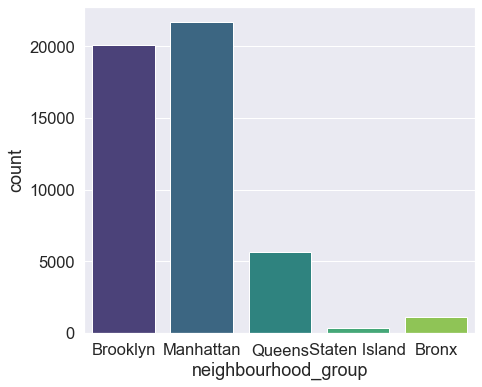

In [ ]:
# analysis of the above using barplot
plt.figure(figsize=(7,6))
sns.countplot(x=df['neighbourhood_group'],palette='viridis')

In [ ]:
#sort based on price for manhattan
data=df[['id','name','host_id','host_name','neighbourhood_group','price']]
data=data[data['neighbourhood_group']=='Manhattan'].sort_values(by='price',ascending=False)
data.head()

,id,name,host_id,host_name,neighbourhood_group,price
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,10000
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,9999
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,9999
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,9999
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,8500


In [ ]:
#the details of the rental place which has got highest number of reviews
df.iloc[df['number_of_reviews'].idxmax()]

id                                                9145202
name                              Room near JFK Queen Bed
host_id                                          47621202
host_name                                            Dona
neighbourhood_group                                Queens
neighbourhood                                     Jamaica
latitude                                          40.6673
longitude                                       -73.76831
room_type                                    Private room
price                                                  47
minimum_nights                                          1
number_of_reviews                                     629
last_review                                    2019-07-05
reviews_per_month                                   14.58
calculated_host_listings_count                          2
availability_365                                      333
Name: 11759, dtype: object

In [ ]:
#the details of the rental place which has got minimum number of reviews
df.iloc[df['number_of_reviews'].idxmin()]

id                                                               3647
name                              THE VILLAGE OF HARLEM....NEW YORK !
host_id                                                          4632
host_name                                                   Elisabeth
neighbourhood_group                                         Manhattan
neighbourhood                                                  Harlem
latitude                                                     40.80902
longitude                                                    -73.9419
room_type                                                Private room
price                                                             150
minimum_nights                                                      3
number_of_reviews                                                   0
last_review                                                       NaN
reviews_per_month                                                 0.0
calculated_host_list

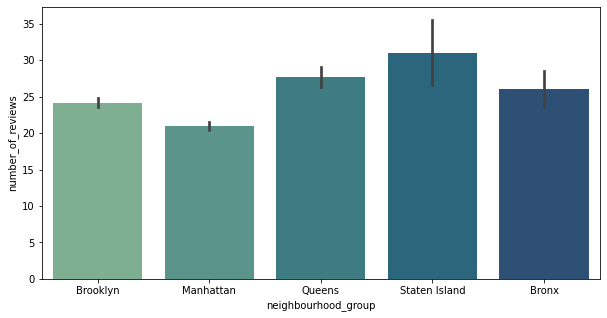

In [ ]:
#analysis using barplot for number of reviews
plt.figure(figsize=(10,5))
sns.barplot(x=df['neighbourhood_group'],y=df['number_of_reviews'],palette='crest')
plt.show()

In [ ]:
#room type
x=list(df['room_type'].unique())
x

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
#number of different type of room available
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='room_type'>

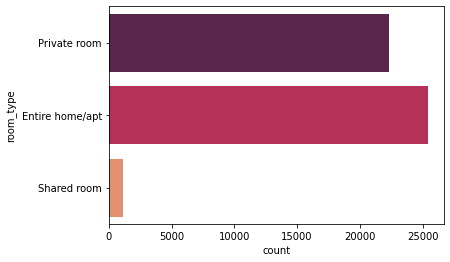

In [ ]:
sns.countplot(y=df['room_type'],palette='rocket')

In [ ]:
#top 20 hosts who has most listing in the dataset
host_data=pd.DataFrame(df['host_id'].value_counts().head(20))
host_data.reset_index(inplace=True)
host_data.rename(columns={'index':'Host_ID', 'host_id':'Count'}, inplace=True)
host_data

,Host_ID,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


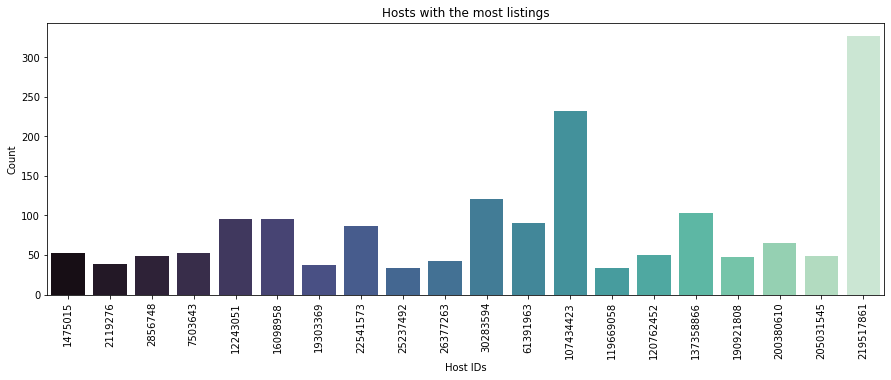

In [ ]:
# data visualization of above dataframe
plt.figure(figsize=(15,5))
graph=sns.barplot(x="Host_ID", y="Count", data=host_data,palette='mako')
graph.set_title('Hosts with the most listings')
graph.set_ylabel('Count')
graph.set_xlabel('Host IDs')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
#unique values for the neighbourhood column
(df['neighbourhood']).unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
#find the maximum and minimum price
print('Maximum price:',df['price'].max())
print('Minimum price:',df['price'].min())

Maximum price: 10000
Minimum price: 0


In [ ]:
neighbourhood_freq=pd.DataFrame(df['neighbourhood'].value_counts())
neighbourhood_freq.reset_index(inplace=True)
neighbourhood_freq.rename(columns={'index':'neighbourhood', 'neighbourhood':'Count'}, inplace=True)
neighbourhood_freq=neighbourhood_freq[:10]

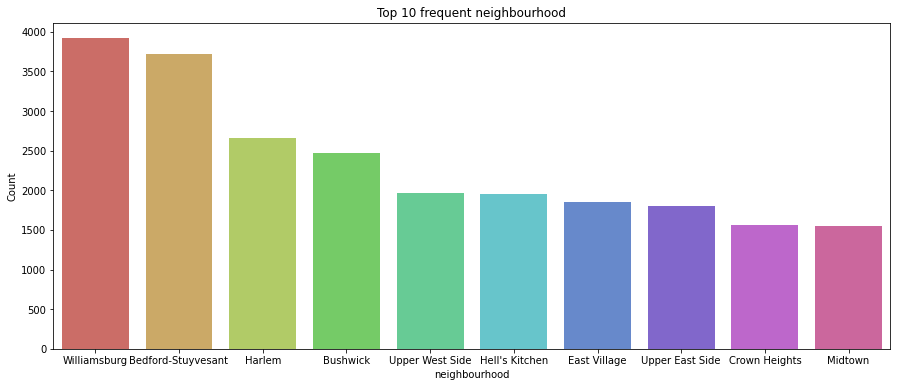

In [ ]:
#10 most frequent neighbourhood
plt.figure(figsize=(15,6))
plot_freq=sns.barplot(data=neighbourhood_freq,x='neighbourhood',y='Count',palette='hls').set(title='Top 10 frequent neighbourhood')
plt.show()

In [ ]:
#mean of the price
print(round(df['price'].mean(),1))

152.7


In [ ]:
#top 10 most expensive neighbourhood
exp=pd.DataFrame({'neighbour':df['neighbourhood'],'price':df['price']})
X_agg = exp.groupby('neighbour', as_index=False).agg({'price':['mean']})
X_agg.columns = ['neighbour', 'price']
expensive=X_agg.sort_values(by='price',ascending=False)[:10]
expensive

,neighbour,price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909
157,Prince's Bay,409.500000
6,Battery Park City,367.557143
75,Flatiron District,341.925000
161,Randall Manor,336.000000
144,NoHo,295.717949


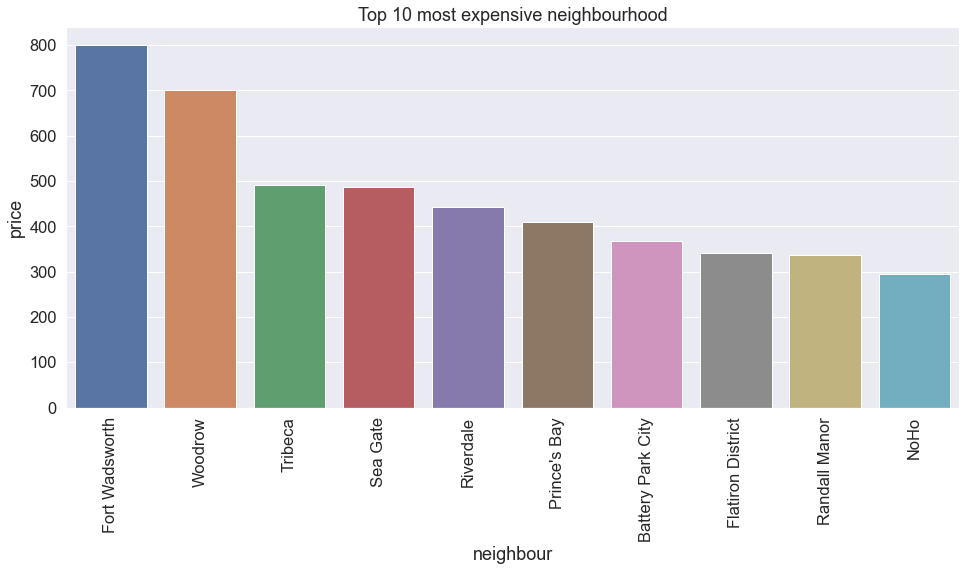

In [ ]:
#data visualization for the above dataframe
plt.figure(figsize=(16,7))
sns.set(font_scale = 1.5)
sns.barplot(data=expensive,x='neighbour',y='price').set(title='Top 10 most expensive neighbourhood')
plt.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
#top 10 most cheapest neighbourhood
exp=pd.DataFrame({'neighbour':df['neighbourhood'],'price':df['price']})
X_agg = exp.groupby('neighbour', as_index=False).agg({'price':['mean']})
X_agg.columns = ['neighbour', 'price']
expensive=X_agg.sort_values(by='price',ascending=True)[:10]
expensive

,neighbour,price
27,Bull's Head,47.333333
102,Hunts Point,50.500000
196,Tremont,51.545455
179,Soundview,53.466667
141,New Dorp,57.000000
24,Bronxdale,57.105263
142,New Dorp Beach,57.400000
88,Grant City,57.666667
46,Concord,58.192308
135,Mount Eden,58.500000


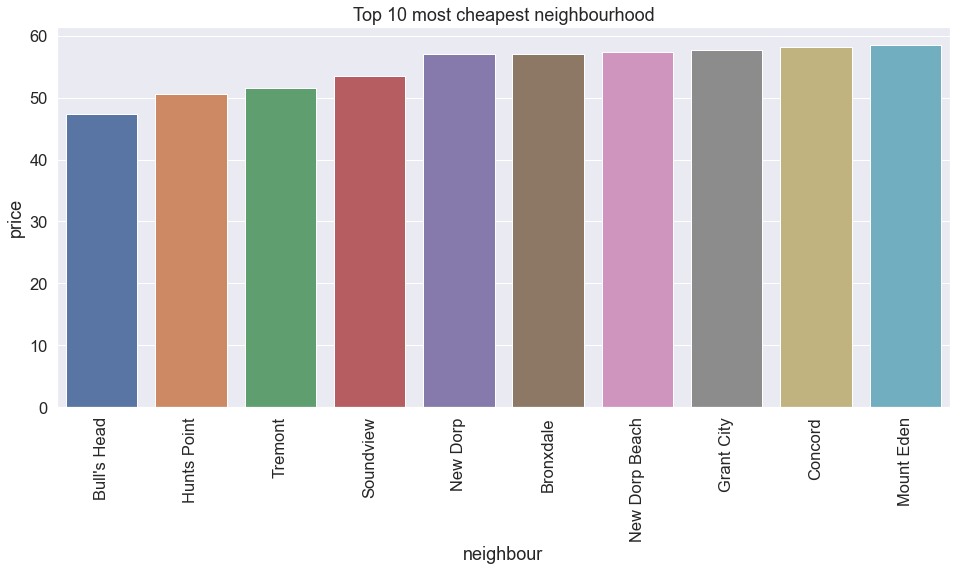

In [ ]:
#data visualization for the above dataframe
plt.figure(figsize=(16,7))
sns.set(font_scale = 1.5)
sns.barplot(data=expensive,x='neighbour',y='price').set(title='Top 10 most cheapest neighbourhood')
plt.tick_params(axis='x', rotation=90)
plt.show()

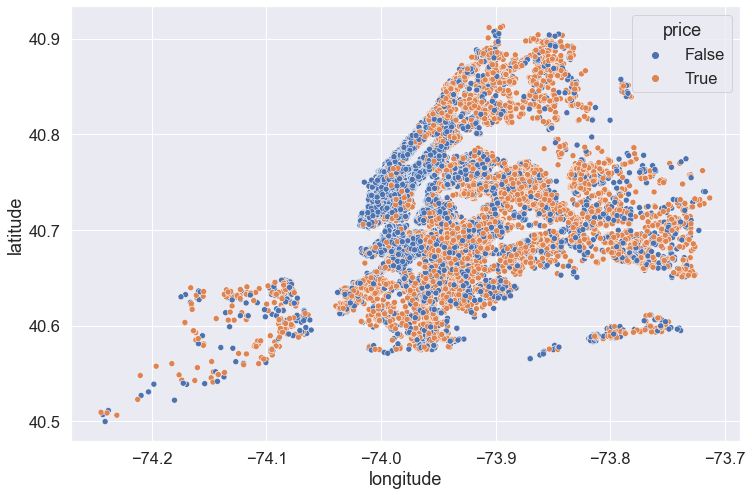

In [ ]:
#geographical analysis
#location of places which have price less than 100 dollars
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.price<100)
plt.show()

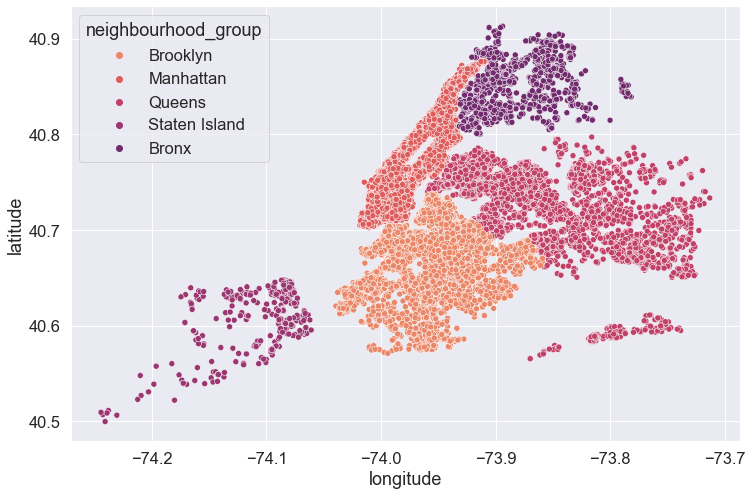

In [ ]:
#neighbourhood_group based on longitude and latitude
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group,palette='flare')
plt.show()

In [ ]:
#shared rooms available for 365 days with price less than 50 and maximum number of reviews
available=df[df['availability_365']==365]
available=available[available['room_type']=='Shared room']
available=available[available['price']<50]
available.sort_values(by='number_of_reviews',ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9966,7664692,SemiPrivateLivingRoomTwinBed/MaimonidesLuthera...,40124500,Regina,Brooklyn,Borough Park,40.63574,-74.00329,Shared room,33,1,73,2019-07-01,1.53,2,365
29979,23078172,Affordable & Convenient,43352661,Charles,Manhattan,Washington Heights,40.84502,-73.94078,Shared room,25,1,51,2019-05-26,2.99,3,365
25001,20022549,"Comfy “sofa bed"" next to LGA AIRPORT and #7 train",32446721,Veronica,Queens,Corona,40.74905,-73.86499,Shared room,37,1,26,2019-06-30,1.10,6,365
16552,13256651,Large Comfy Couch in South Prospect Park,56142507,Marie,Brooklyn,Flatbush,40.64542,-73.96484,Shared room,46,1,22,2019-05-17,0.58,1,365
33424,26420626,Ladies bedroom Bed 4,119669058,Melissa,Brooklyn,Bedford-Stuyvesant,40.69299,-73.95675,Shared room,38,1,21,2019-07-04,1.77,34,365
